# **ECOMMERCE SHIPPING PREDICTION USING MACHINE LEARNING**

# **Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# **Read the Dataset**

In [ ]:
df=pd.read_csv("/content/Train.csv")

In [ ]:
df

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   
1                    5                  216                2   
2                    2                  183                4   
3                    3                  176                4   
4                    2                  184                3   
...                ...                  ...              ...   
10994                1                  252                5   
10995                1                  232                5   
10996                4                  242                5   
10997                2                  223                6   
10998                5                  155                5   

      Product_importance Gender  Discount_offered  Weight_in_gms  \
0                    low      F                44           1233   
1                    low      M                59           3088   
2                    low      M                48           3374   
3                 medium      M                10           1177   
4                 medium      F                46           2484   
...                  ...    ...               ...            ...   
10994             medium      F                 1           1538   
10995             medium      F                 6           1247   
10996                low      F                 4           1155   
10997             medium      M                 2           1210   
10998                low      F                 6           1639   

       Reached.on.Time_Y.N  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
10994                    1  
10995                    0  
10996                    0  
10997                    0  
10998                    0  

[10999 rows x 12 columns]

In [ ]:
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [ ]:
df.tail()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
10994                1                  252                5   
10995                1                  232                5   
10996                4                  242                5   
10997                2                  223                6   
10998                5                  155                5   

      Product_importance Gender  Discount_offered  Weight_in_gms  \
10994             medium      F                 1           1538   
10995             medium      F                 6           1247   
10996                low      F                 4           1155   
10997             medium      M                 2           1210   
10998                low      F                 6           1639   

       Reached.on.Time_Y.N  
10994                    1  
10995                    0  
10996                    0  
10997                    0  
10998                    0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.describe()

ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

In [ ]:
df.shape

(10999, 12)

# **DATA PREPARATION**

# **Handling missing values**

In [ ]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
df.isnull().any()

ID                     False
Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls    False
Customer_rating        False
Cost_of_the_Product    False
Prior_purchases        False
Product_importance     False
Gender                 False
Discount_offered       False
Weight_in_gms          False
Reached.on.Time_Y.N    False
dtype: bool

In [ ]:
df.duplicated().any()

False

# **Handling Categorical Values**

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le=LabelEncoder()

In [58]:
df['Warehouse_block']=le.fit_transform(df['Warehouse_block'])
df['Mode_of_Shipment']=le.fit_transform(df['Mode_of_Shipment'])
df['Product_importance']=le.fit_transform(df['Product_importance'])
df['Gender']=le.fit_transform(df['Gender'])

# **Handling Outliers**

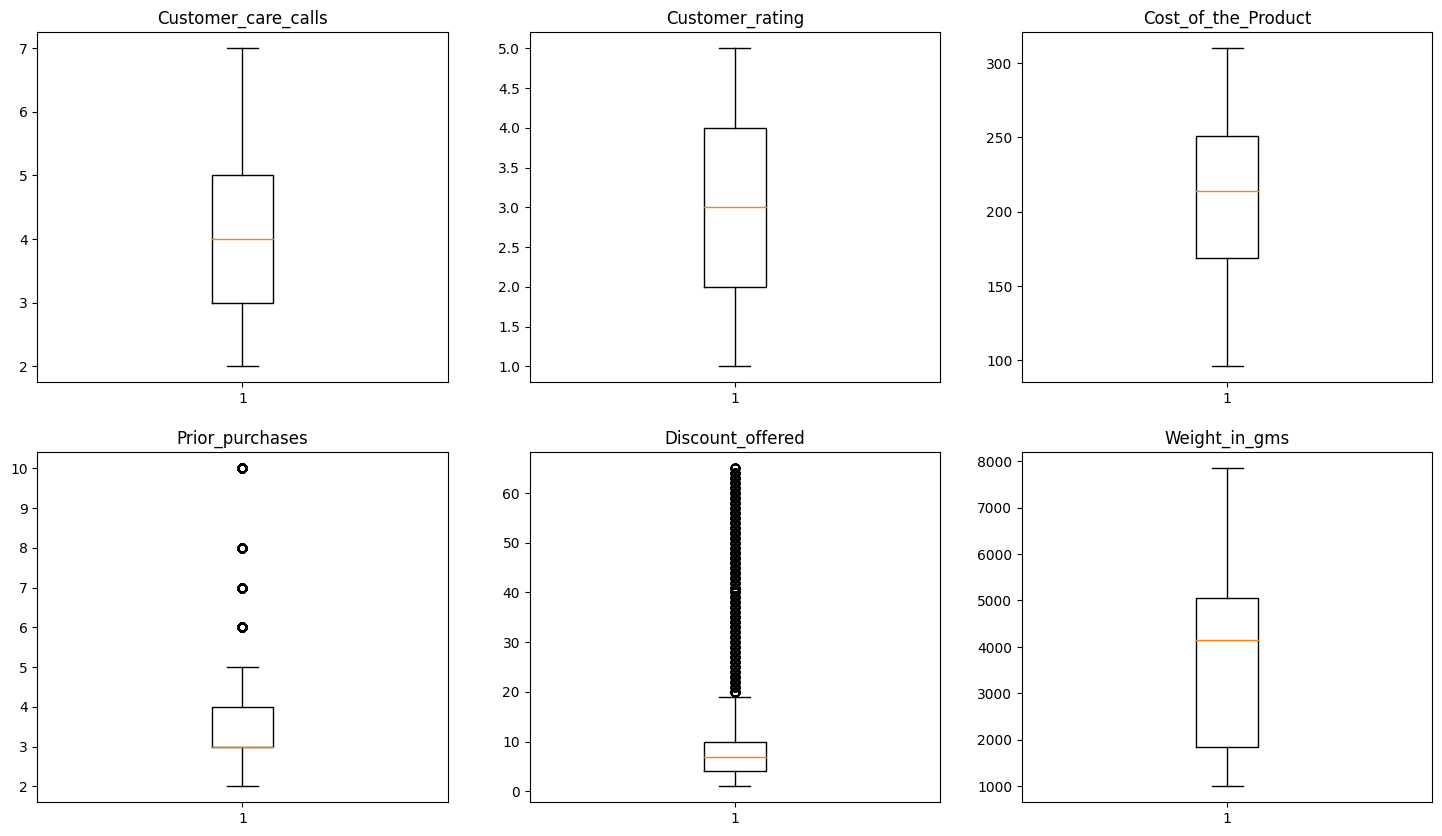

In [ ]:
c=0
plt.figure(figsize=(18, 10))
for i in df.drop(columns=['Warehouse_block', 'Mode_of_Shipment','Product_importance', 'Gender', 'Reached.on.Time_Y.N','ID']).columns:
  if str(df[i].dtype)=='object':
    continue
  plt.subplot(2, 3, c+1)
  plt.boxplot(df[i])
  plt.title(i)
  c+=1
plt.show()

In [ ]:
def check_outliers(arr):
  Q1=np.percentile(arr, 25, interpolation='midpoint')
  Q3=np.percentile(arr, 75, interpolation='midpoint')
  IQR=Q3-Q1
  #Above Upper bound
  upper=Q3+1.5*IQR
  upper_array=np.array(arr>=upper)
  print(''*3,len(upper_array[upper_array == True]), 'are over the upper bound:',upper)

#Below Lower bound
  lower=Q1-1.5*IQR
  lower_array=np.array(arr<=lower)
  print(''*3, len(lower_array[lower_array == True]), 'are less than the lower bound:', lower, '\n')

for i in df.drop(columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N','ID']).columns:
   if str(df[i].dtype)=='object':
       continue
   print(i)
   check_outliers(df[i])

Customer_care_calls
 0 are over the upper bound: 8.0
 0 are less than the lower bound: 0.0 

Customer_rating
 0 are over the upper bound: 7.0
 0 are less than the lower bound: -1.0 

Cost_of_the_Product
 0 are over the upper bound: 374.0
 0 are less than the lower bound: 46.0 

Prior_purchases
 1003 are over the upper bound: 5.5
 0 are less than the lower bound: 1.5 

Discount_offered
 2262 are over the upper bound: 19.0
 0 are less than the lower bound: -5.0 

Weight_in_gms
 0 are over the upper bound: 9865.75
 0 are less than the lower bound: -2976.25 



# **EXPLORATORY DATA ANALYSIS**

# **Descriptive Statistics**



In [ ]:
df.describe(include='all')

ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
count  10999.00000     10999.000000      10999.000000         10999.000000   
mean    5500.00000         1.833167          0.998454             4.054459   
std     3175.28214         1.343823          0.567099             1.141490   
min        1.00000         0.000000          0.000000             2.000000   
25%     2750.50000         1.000000          1.000000             3.000000   
50%     5500.00000         1.000000          1.000000             4.000000   
75%     8249.50000         3.000000          1.000000             5.000000   
max    10999.00000         4.000000          2.000000             7.000000   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
count     10999.000000         10999.000000     10999.000000   
mean          2.990545           210.196836         3.567597   
std           1.413603            48.063272         1.522860   
min           1.000000            96.000000         2.000000   
25%           2.000000           169.000000         3.000000   
50%           3.000000           214.000000         3.000000   
75%           4.000000           251.000000         4.000000   
max           5.000000           310.000000        10.000000   

       Product_importance        Gender  Discount_offered  Weight_in_gms  \
count        10999.000000  10999.000000      10999.000000   10999.000000   
mean             0.604600      0.495863         13.373216    3634.016729   
std              0.641464      0.500006         16.205527    1635.377251   
min              0.000000      0.000000          1.000000    1001.000000   
25%              0.000000      0.000000          4.000000    1839.500000   
50%              1.000000      0.000000          7.000000    4149.000000   
75%              1.000000      1.000000         10.000000    5050.000000   
max              2.000000      1.000000         65.000000    7846.000000   

       Reached.on.Time_Y.N  
count         10999.000000  
mean              0.596691  
std               0.490584  
min               0.000000  
25%               0.000000  
50%               1.000000  
75%               1.000000  
max               1.000000

In [ ]:
sub=df["Reached.on.Time_Y.N"].value_counts()
sub

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

# **Visual Analysis**


**Univariate analysis**

<Axes: xlabel='Gender', ylabel='count'>

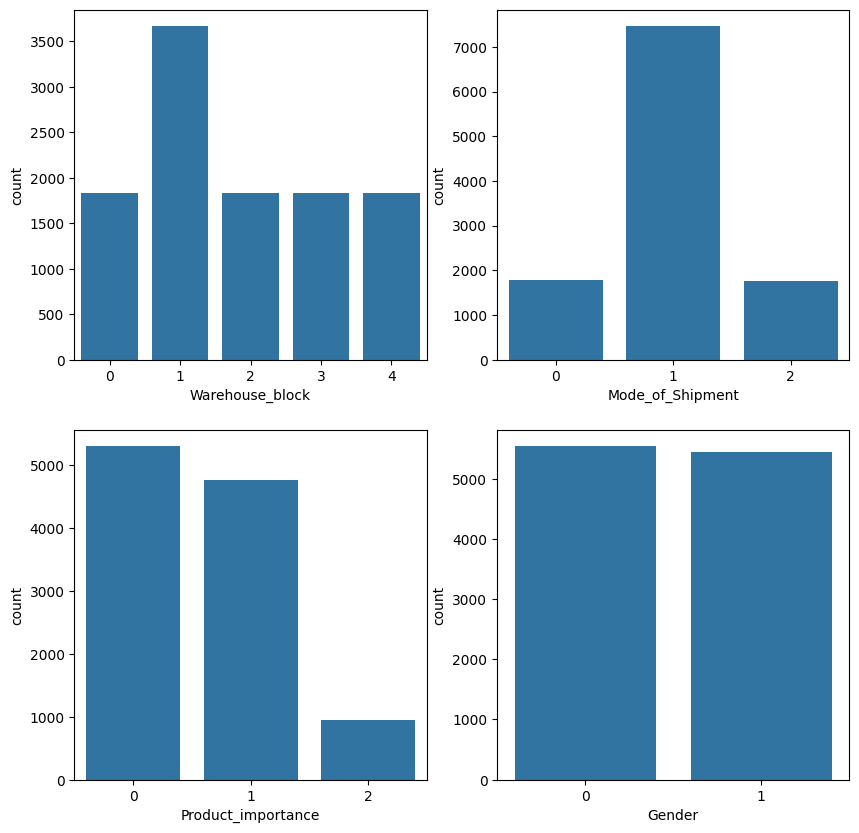

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x='Warehouse_block',data=df)

plt.subplot(2,2,2)
sns.countplot(x='Mode_of_Shipment',data=df)

plt.subplot(2,2,3)
sns.countplot(x='Product_importance',data=df)

plt.subplot(2,2,4)
sns.countplot(x='Gender',data=df)

array([<Axes: ylabel='count'>], dtype=object)

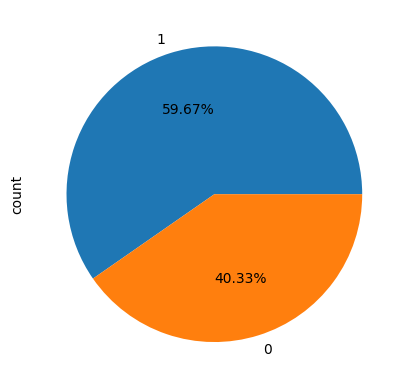

In [ ]:
sub.plot(kind="pie",subplots=True,autopct="%1.2f%%")

# **Bivariate**

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Warehouse_block'>

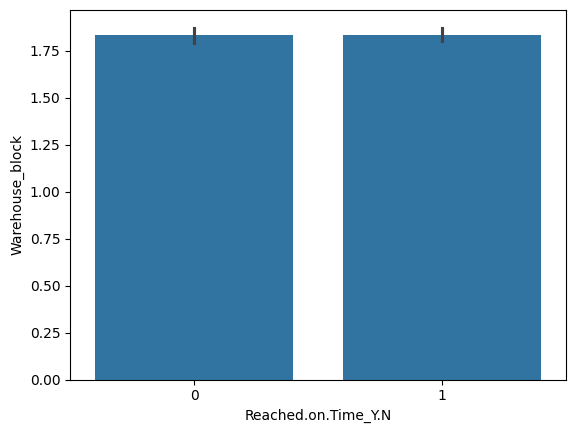

In [ ]:
sns.barplot(x='Reached.on.Time_Y.N', y='Warehouse_block',data=df)

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Mode_of_Shipment'>

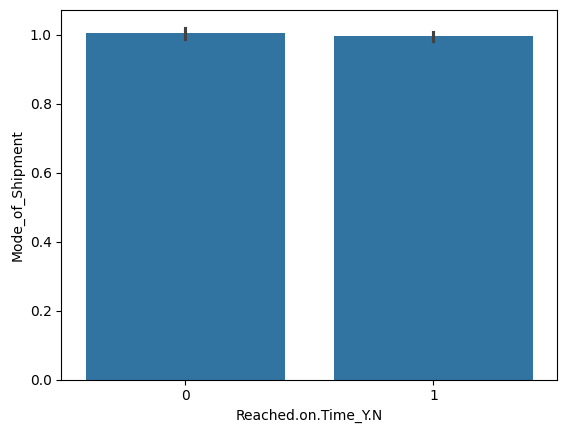

In [ ]:
sns.barplot(x='Reached.on.Time_Y.N', y='Mode_of_Shipment',data=df)

# **Multivariate**

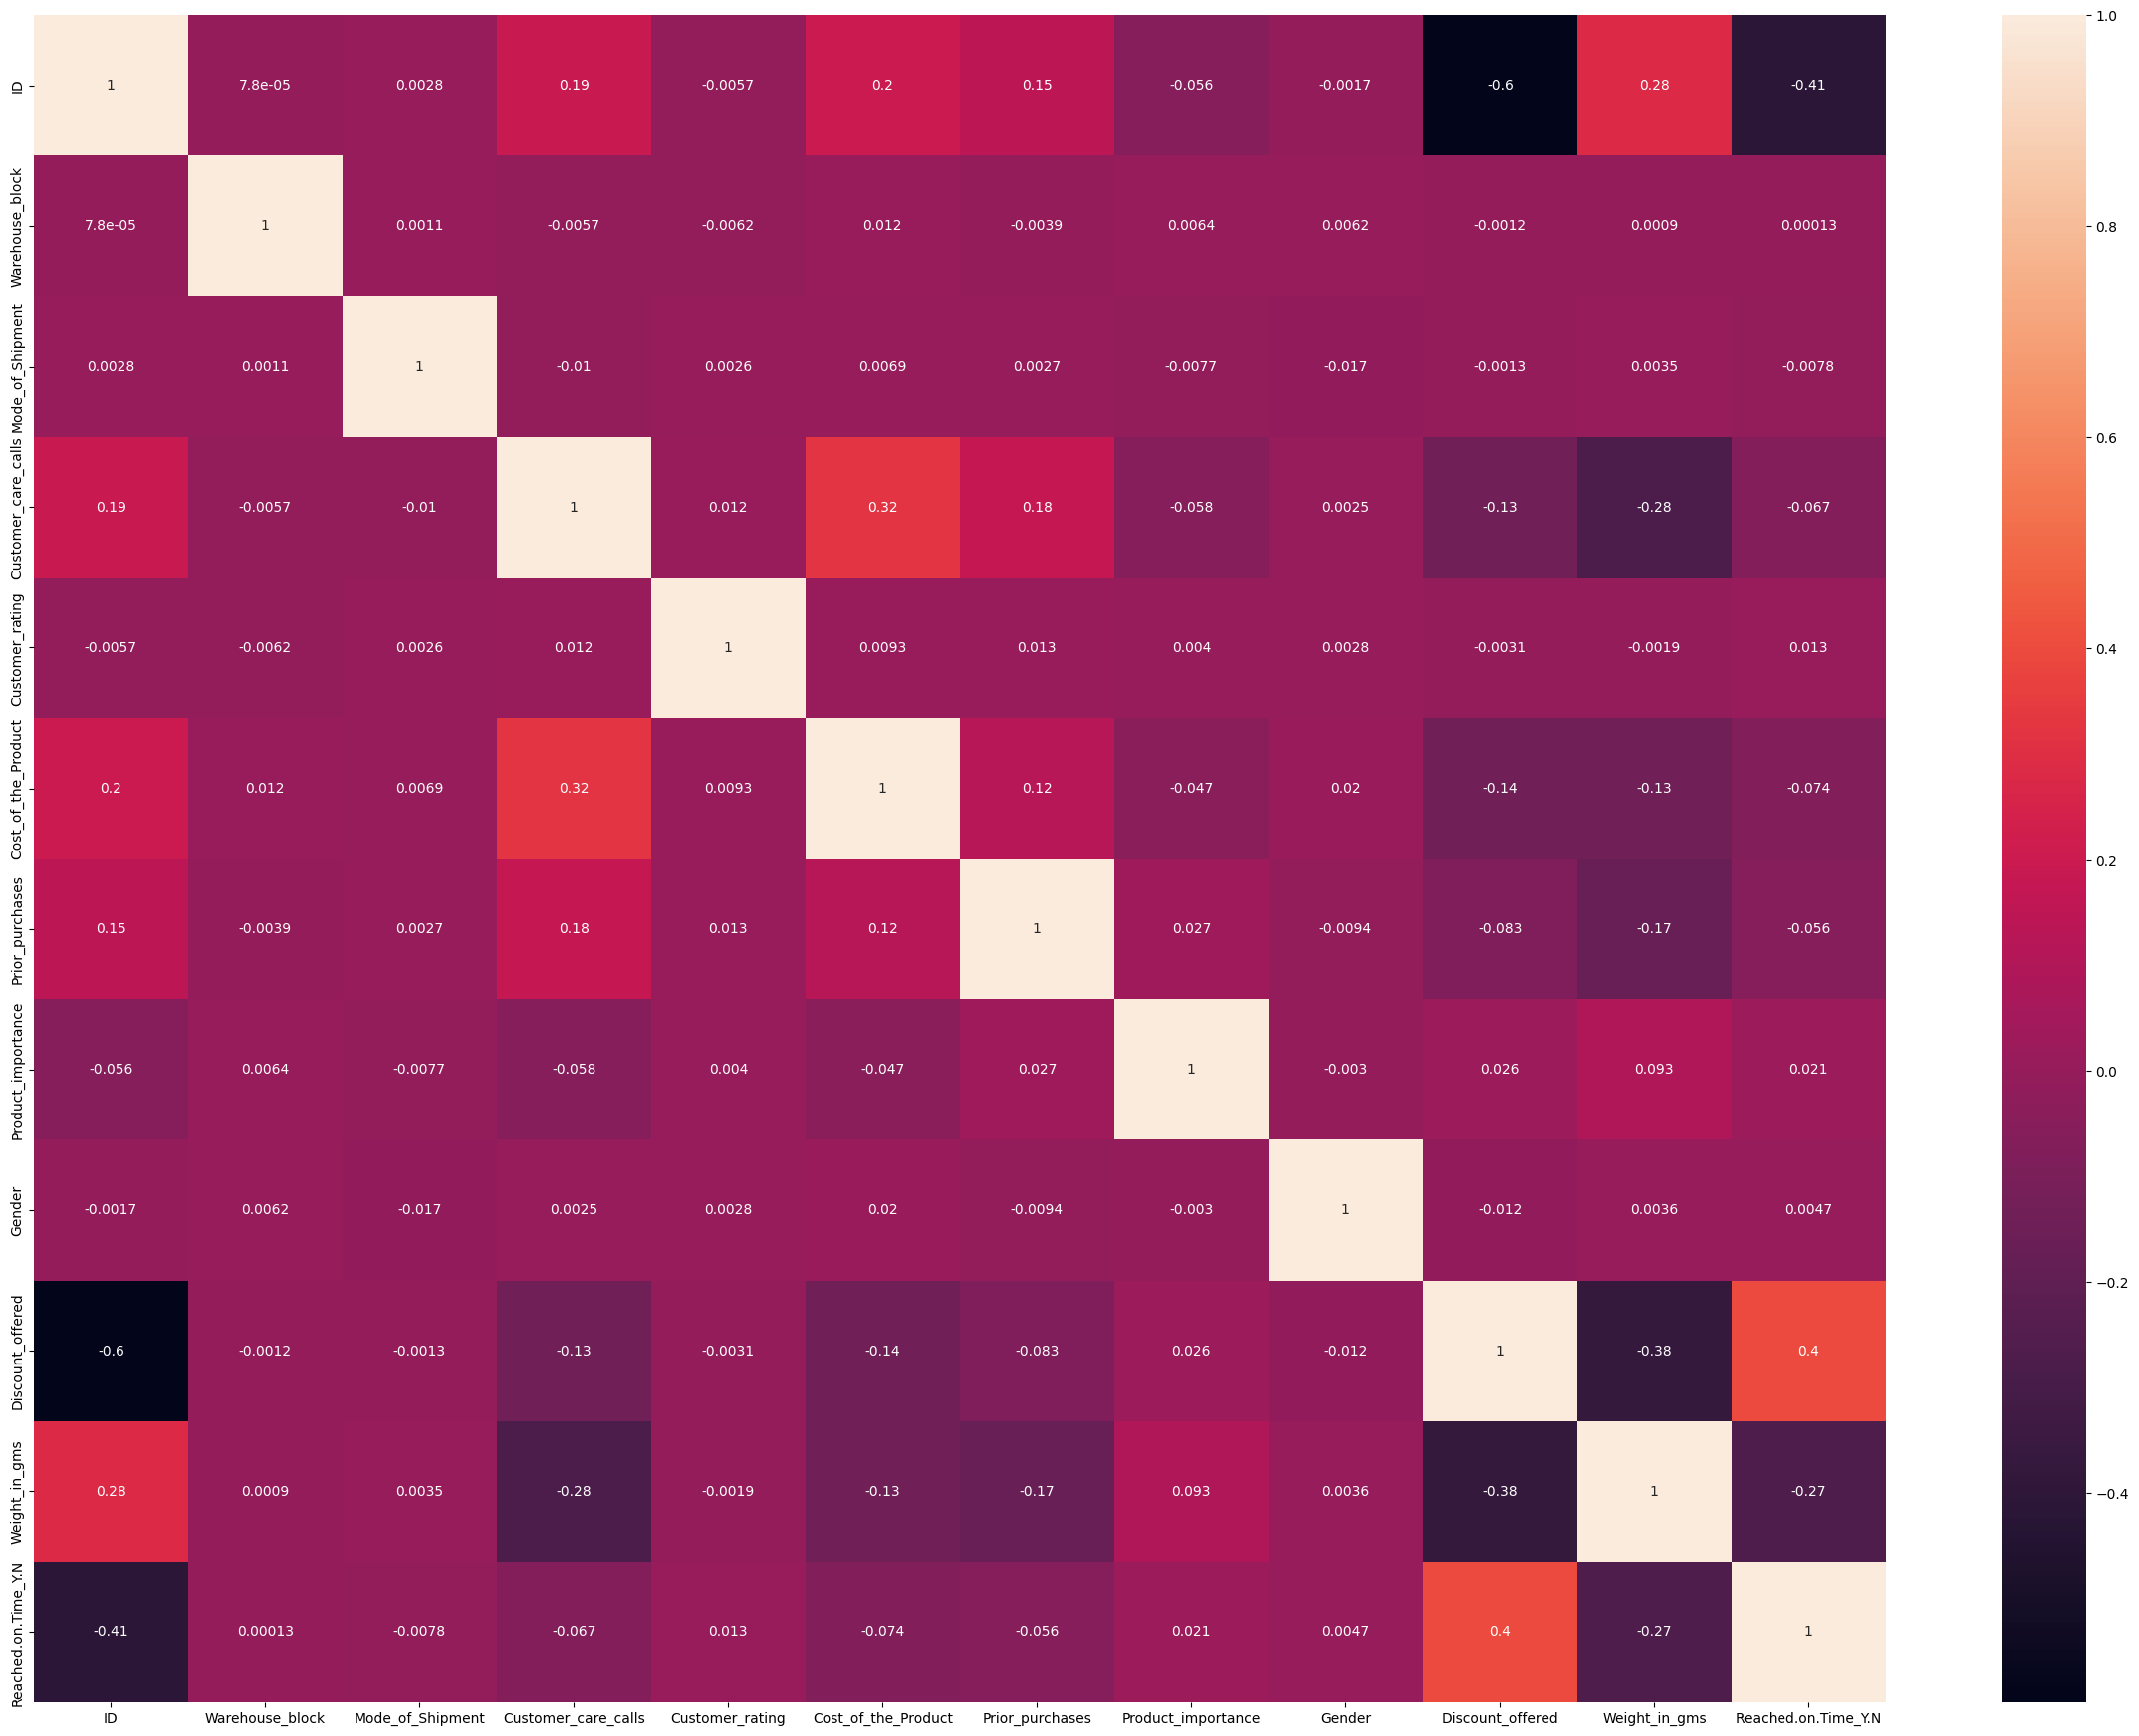

In [ ]:
plt.figure(figsize=(30,22))
sns.heatmap(df.corr(),annot=True)
plt.show()

# **Splitting** **data** **into** **train,split** **and** **test**

In [59]:
x = df.drop(['ID','Reached.on.Time_Y.N'], axis=1)
y = df['Reached.on.Time_Y.N']

In [60]:
x

Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0                    0                 0                    4   
1                    1                 0                    4   
2                    2                 0                    2   
3                    3                 0                    3   
4                    4                 0                    2   
...                ...               ...                  ...   
10994                2                 1                    4   
10995                3                 1                    4   
10996                4                 1                    5   
10997                1                 1                    5   
10998                0                 1                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   
1                    5                  216                2   
2                    2                  183                4   
3                    3                  176                4   
4                    2                  184                3   
...                ...                  ...              ...   
10994                1                  252                5   
10995                1                  232                5   
10996                4                  242                5   
10997                2                  223                6   
10998                5                  155                5   

       Product_importance  Gender  Discount_offered  Weight_in_gms  
0                       0       0                44           1233  
1                       0       1                59           3088  
2                       0       1                48           3374  
3                       1       1                10           1177  
4                       1       0                46           2484  
...                   ...     ...               ...            ...  
10994                   1       0                 1           1538  
10995                   1       0                 6           1247  
10996                   0       0                 4           1155  
10997                   1       1                 2           1210  
10998                   0       0                 6           1639  

[10999 rows x 10 columns]

# **Scaling**

In [61]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
sc = StandardScaler()

# Transform your data
scaled_data = sc.fit_transform(x)
scaled_data

array([[-1.36420462e+00, -1.76071442e+00, -4.77113150e-02, ...,
        -9.91760464e-01,  1.88998336e+00, -1.46823975e+00],
       [-6.20025349e-01, -1.76071442e+00, -4.77113150e-02, ...,
         1.00830799e+00,  2.81563557e+00, -3.33893327e-01],
       [ 1.24153919e-01, -1.76071442e+00, -1.79988745e+00, ...,
         1.00830799e+00,  2.13682395e+00, -1.59002181e-01],
       ...,
       [ 1.61251246e+00,  2.72556412e-03,  8.28376755e-01, ...,
        -9.91760464e-01, -5.78422524e-01, -1.51593733e+00],
       [-6.20025349e-01,  2.72556412e-03,  8.28376755e-01, ...,
         1.00830799e+00, -7.01842818e-01, -1.48230442e+00],
       [-1.36420462e+00,  2.72556412e-03, -1.79988745e+00, ...,
        -9.91760464e-01, -4.55002229e-01, -1.21996770e+00]])

In [62]:
x.shape

(10999, 10)

In [63]:
x

Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0                    0                 0                    4   
1                    1                 0                    4   
2                    2                 0                    2   
3                    3                 0                    3   
4                    4                 0                    2   
...                ...               ...                  ...   
10994                2                 1                    4   
10995                3                 1                    4   
10996                4                 1                    5   
10997                1                 1                    5   
10998                0                 1                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   
1                    5                  216                2   
2                    2                  183                4   
3                    3                  176                4   
4                    2                  184                3   
...                ...                  ...              ...   
10994                1                  252                5   
10995                1                  232                5   
10996                4                  242                5   
10997                2                  223                6   
10998                5                  155                5   

       Product_importance  Gender  Discount_offered  Weight_in_gms  
0                       0       0                44           1233  
1                       0       1                59           3088  
2                       0       1                48           3374  
3                       1       1                10           1177  
4                       1       0                46           2484  
...                   ...     ...               ...            ...  
10994                   1       0                 1           1538  
10995                   1       0                 6           1247  
10996                   0       0                 4           1155  
10997                   1       1                 2           1210  
10998                   0       0                 6           1639  

[10999 rows x 10 columns]

In [64]:
from sklearn.model_selection import train_test_split
print(x.shape)
print(y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10999, 10)
(10999,)
(8799, 10)
(2200, 10)
(8799,)
(2200,)


# **MODEL BUILDING**

# DecisionTreeClassifier

In [65]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [66]:
# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate the classifier
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.57      0.57       895
           1       0.71      0.71      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



# **Logistic Regression**

In [67]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()

log=lg.fit(x_train,y_train)

y_pred=lg.predict(x_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("-------------------------------------------")
print("Classification report:\n",classification_report(y_test, y_pred))

Confusion Matrix: 
 [[503 392]
 [412 893]]
-------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.55      0.56      0.56       895
           1       0.69      0.68      0.69      1305

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.63      0.64      2200



# **RandomForest Classifier**

In [68]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [ ]:
RF.fit(x_train, y_train)
RFtrain =RF.predict(x_train)
RFtest =RF.predict(x_test)

In [ ]:
# Print classification report , confusion matrix
print(confusion_matrix(RFtrain,y_train))
print(confusion_matrix(RFtest,y_test))
print(classification_report(RFtrain,y_train))
print(classification_report(RFtest,y_test))

[[3555    0]
 [   0 5244]]
[[626 489]
 [255 830]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3555
           1       1.00      1.00      1.00      5244

    accuracy                           1.00      8799
   macro avg       1.00      1.00      1.00      8799
weighted avg       1.00      1.00      1.00      8799

              precision    recall  f1-score   support

           0       0.71      0.56      0.63      1115
           1       0.63      0.76      0.69      1085

    accuracy                           0.66      2200
   macro avg       0.67      0.66      0.66      2200
weighted avg       0.67      0.66      0.66      2200



# **svm**

In [69]:
# Train an SVM classifier on the resampled data
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
svm =SVC(kernel='rbf',C=2.0, random_state=42)
svm.fit(x_train, y_train)

# Make predictions on the test set
y_pred =svm.predict(x_test)

# Print classification report , confusion matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[584 311]
 [405 900]]
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       895
           1       0.74      0.69      0.72      1305

    accuracy                           0.67      2200
   macro avg       0.67      0.67      0.67      2200
weighted avg       0.68      0.67      0.68      2200



# **Training The Model In Multiple Algorithms**

Creating function to train the models

In [71]:
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV

In [72]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)
def models_eval_mm(x_train,y_train,x_test,y_test):
  lg = LogisticRegression(random_state=1234)
  lg.fit(x_train,y_train)
  print('--Logistic Regression')
  print('Train Score:', lg.score(x_train,y_train))
  print('Test Score:',lg.score(x_test,y_test))
  print()

  lcv = LogisticRegressionCV (random_state=1234)
  lcv.fit(x_train,y_train)
  print('--Logistic Regression CV')
  print('Train Score:',lcv.score(x_train,y_train))
  print('Test Score:',lcv.score(x_test,y_test))
  print()

  print('--XGBoost')
  xgb = XGBClassifier(random_state=1234)
  xgb.fit(x_train,y_train)
  print('Train Score:',xgb.score(x_train,y_train))
  print('Test Score:',xgb.score(x_test,y_test))
  print()

  print('--Ridge Classifier')
  rg = RidgeClassifier(random_state=1234)
  rg.fit(x_train,y_train)
  print('Train Score:', rg.score(x_train,y_train))
  print('Test Score:', rg.score(x_test,y_test))
  print()

  print('--KNN')
  knn = KNeighborsClassifier()
  knn.fit(x_train,y_train)
  print('Train Score:',knn.score(x_train,y_train))
  print('Test Score:',knn.score(x_test,y_test))
  print()

  print('--Random Forest')
  rf=RandomForestClassifier(random_state=1234)
  rf.fit(x_train,y_train)
  print('Train Score:', rf.score(x_train,y_train))
  print('Test Score:', rf.score(x_test,y_test))
  print()

  print('--SM classifier')
  svc=svm.SVC(random_state=1234)
  svc.fit(x_train,y_train)
  print("Train Score:", svc.score(x_train,y_train))
  print('Test Score:',svc.score(x_test,y_test))
  print()

  return lg,lcv,xgb,rg,knn,rf,svc


Calling the function

In [73]:
lg,lcv,xgb,rg,knn,rf,svc=models_eval_mm(x_train_normalized,y_train,x_test_normalized,y_test)

--Logistic Regression
Train Score: 0.6374588021366064
Test Score: 0.6431818181818182

--Logistic Regression CV
Train Score: 0.6412092283214001
Test Score: 0.6381818181818182

--XGBoost
Train Score: 0.9145357426980338
Test Score: 0.6681818181818182

--Ridge Classifier
Train Score: 0.6504148198658939
Test Score: 0.649090909090909

--KNN
Train Score: 0.7742925332424139
Test Score: 0.6431818181818182

--Random Forest
Train Score: 1.0
Test Score: 0.6572727272727272

--SM classifier
Train Score: 0.6915558586202978
Test Score: 0.6536363636363637



# **Testing The Model**

In [74]:
print('--Logistic Regression--')
lg.predict(x_test_normalized[0].reshape(1,-1))

--Logistic Regression--


array([1])

In [75]:
print('--Logistic Regression CV--')
lcv.predict(x_test_normalized[0].reshape(1,-1))

--Logistic Regression CV--


array([1])

In [76]:
print('--XGBoost--')
xgb.predict(x_test_normalized[0].reshape(1,-1))

--XGBoost--


array([1])

In [77]:
print('--Ridge Classifier-')
rg.predict(x_test_normalized[0].reshape(1,-1))

--Ridge Classifier-


array([1])

In [78]:
print('--KNN--')
knn.predict(x_test_normalized[0].reshape(1,-1))

--KNN--


array([1])

In [79]:
print('--Random Forest--')
rf.predict(x_test_normalized[0].reshape(1,-1))

--Random Forest--


array([1])

In [80]:
print('--SVM Classifier--')
svc.predict(x_test_normalized[0].reshape(1,-1))

--SVM Classifier--


array([1])

# **Performance Testing & Hyperparameter Tuning**

# Compare The Model

# Model evaluation before hyper parameter tuning

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import pandas as pd

def tune_and_evaluate(model_name, model, param_grid, x_train, y_train, x_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    result = []
    result.append(model_name)
    result.append("{:.2f}".format(accuracy_score(y_test, y_pred) * 100))
    result.append("{:.2f}".format(f1_score(y_test, y_pred, average='weighted') * 100))
    result.append("{:.2f}".format(recall_score(y_test, y_pred, average='weighted') * 100))
    result.append("{:.2f}".format(precision_score(y_test, y_pred, average='weighted') * 100))

    return result
models = {
    'Logistic Regression': LogisticRegression(),
    'Logistic Regression CV': LogisticRegressionCV(),
    'XGBoost': XGBClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC()
}

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear']
    },
    'Logistic Regression CV': {
        'Cs': [1, 10],
        'cv': [3, 5]
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1]
    },
    'Ridge Classifier': {
        'alpha': [0.1, 1, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'Support Vector Classifier': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

model_eval_info = []

for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    model_eval_info.append(tune_and_evaluate(name, model, param_grids[name], x_train_normalized, y_train, x_test_normalized, y_test))

model_eval_info_df = pd.DataFrame(model_eval_info, columns=['Name', 'Accuracy', 'F1_score', 'Recall', 'Precision'])
model_eval_info_df.to_csv('model_eval.csv', index=False)
model_eval_info_df

Tuning hyperparameters for Logistic Regression...
Tuning hyperparameters for Logistic Regression CV...
Tuning hyperparameters for XGBoost...
Tuning hyperparameters for Ridge Classifier...
Tuning hyperparameters for KNN...
Tuning hyperparameters for Random Forest...
Tuning hyperparameters for Support Vector Classifier...


Name Accuracy F1_score Recall Precision
0        Logistic Regression    64.14    63.97  64.14     63.86
1     Logistic Regression CV    63.77    63.23  63.77     63.12
2                    XGBoost    69.14    68.48  69.14     78.76
3           Ridge Classifier    64.91    64.90  64.91     64.88
4                        KNN    63.95    64.15  63.95     64.52
5              Random Forest    69.14    68.90  69.14     75.83
6  Support Vector Classifier    66.91    67.12  66.91     70.02

# Comparing model accuracy before & after applying hyperparameters tuning

In [82]:
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 1234,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [83]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [84]:
lcv.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1234,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

# Hyperparameter optimization for XGBoost



In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
params = {'min_child_weight': [10,20], 'gamma': [1.5, 2.0, 2.5],'colsample_bytree': [0.6, 0.8, 0.9],'max_depth': [4,5,6]}
xgb = XGBClassifier(learning_rate=0.5, n_estimators=100, objective='binary:logistic', nthread=3)
fitmodel=GridSearchCV(xgb, param_grid=params, cv=5, refit=True, scoring="accuracy", n_jobs=-1, verbose=3)
fitmodel.fit(x_train_normalized, y_train)
print(fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=20, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=3,
              num_parallel_tree=None, ...) {'colsample_bytree': 0.8, 'gamma': 2.5, 'max_depth': 4, 'min_child_weight': 20} 0.6823509612899892


# Logistic regression hyper parameter Tuning


In [86]:
# Plug in appropriate max_depth and random_state parameters
lg=LogisticRegressionCV(n_jobs=-1, random_state= 1234)
lg_param_grid = {'Cs': [6,8,10,15,20],'max_iter': [60,80,100]
}
lg_cv= GridSearchCV(lg,lg_param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=3)
lg_cv.fit(x_train_normalized,y_train)



Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegressionCV(n_jobs=-1, random_state=1234),
             n_jobs=-1,
             param_grid={'Cs': [6, 8, 10, 15, 20], 'max_iter': [60, 80, 100]},
             scoring='accuracy', verbose=3)

# Random Forest Hyperparameter tuning



In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Define the RandomForestClassifier
rfc = RandomForestClassifier()
# Define the parameter grid
rfc_param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['entropy', 'gini'],
    'max_depth': [5, 10],
    'max_features': ['sqrt', 'log2'],
}
rfc_cv = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=3)
rfc_cv.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=3)

# Decision tree classifier-Hyper parameter Tunning

In [88]:
dec=DecisionTreeClassifier(random_state=42)
params={ 'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ['gini', 'entropy']
}
dec_cv=GridSearchCV(dec,param_grid=params,cv=5,n_jobs=-1,scoring="accuracy",verbose=3)
dec_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=3)

# Logistic Regression Hyper Parameter Tunning

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=-1, random_state=42)
lr_param_grid={
    'C': [0.1, 0.5, 1, 5, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}
lr_cv = GridSearchCV(estimator=lr, param_grid=lr_param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=True)
lr_cv.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=True)

# K-nearest Neighbors Hyper Parameter Tuning

In [90]:
knn=KNeighborsClassifier()
params={
    'n_neighbors':[3,5,7,9,11],
    'weights':['uniform','distance'],
    'metric':['minkowski','eculidean','manhattan']
}
knn_cv = GridSearchCV(knn, param_grid=params,cv=5, n_jobs=-1, verbose=3)
knn_cv.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'eculidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             verbose=3)

# XGBoost classifier Hyper Parameter Tunning

In [91]:
params={
    'min_child_weight':[10,20],
    'gamns':[1.5,2,2.5],
    'colsample_bytree':[0.6,0.8,0.9],
    'max_depth':[4,5,6]
}
xg=XGBClassifier(learning_rate=0.5,n_estimators=100,objective='binary:logistic',nthreads=3)
xg_cv= GridSearchCV(xg,param_grid=params, cv=5,refit=True,scoring='accuracy',n_jobs=-1, verbose=3)
xg_cv.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.5, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, nthreads=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 0.9],
                         'gamns': [1.5, 2, 2.5], 'max_depth': [4, 5, 6],
                         'min_child_weight': [10, 20]},
             scoring='accuracy', verbose=3)

# Ridge Classifier Hyper Paremeter Tunning

In [92]:
rg=RidgeClassifier(random_state=42)
params={
    'alpha':(np.logspace(-8,8,100))
}
rg_cv=GridSearchCV(rg,param_grid=params,cv=5)
rg_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RidgeClassifier(random_state=42),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081...
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

# Model evaluation after hyper parameter tuning

In [93]:
def eval(name, model):
  y_pred=model.predict(x_test)
  result=[]
  result.append(name)
  result.append("{:.2f}".format(accuracy_score(y_test,y_pred)*100))
  result.append("{:.2f}".format(f1_score(y_test,y_pred)*100))
  result.append("{:.2f}".format(recall_score(y_test,y_pred)*100))
  result.append("{:.2f}".format(precision_score(y_test,y_pred)*100))
  return result
model_list={
    'logisticregression':lr_cv,
    'decision tree classifier':dec_cv,
    'Random forest':rfc_cv,
    'k-Nearest nieghbors':knn_cv,
    'xgboost':xg_cv,
    'ridge classifier':rg_cv,
}
model_eval_info=[]
for i in model_list.keys():
  model_eval_info.append(eval(i,model_list[i]))
model_eval_info=pd.DataFrame(model_eval_info, columns=["Name", "Accuracy", "f1_score", "Recall", "Precision"])
model_eval_info.to_csv('model_eval.csv')
model_eval_info

Name Accuracy f1_score Recall Precision
0        logisticregression    65.59    71.27  71.95     70.60
1  decision tree classifier    68.55    66.38  52.34     90.70
2             Random forest    68.86    66.21  51.42     92.94
3       k-Nearest nieghbors    64.82    70.07  69.43     70.73
4                   xgboost    66.32    69.69  65.29     74.74
5          ridge classifier    65.14    70.40  69.89     70.92

## **Pickle**

In [94]:
import pickle as pkl

In [95]:
pkl.dump(rfc_cv,open('mode.pkl','wb'))

In [96]:
pkl.dump(sc,open('norm.pkl','wb'))